In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [27]:
########### 2a Personen mit >70 Bildern #############
import os, tarfile
from urllib.request import urlretrieve
if not os.path.isfile('lfw-funneled.tgz'):
    print("Downloading")
    urlretrieve('http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz',filename = 'lfw-funneled.tgz')
    
# Pfad zur heruntergeladenen tgz-Datei
tgz_file = 'lfw-funneled.tgz'

# Zielverzeichnis für die Extraktion
extracted_directory = 'lfw_funneled'

# Extrahiere den Datensatz aus der tgz-Datei
if not os.path.exists(extracted_directory):
    with tarfile.open(tgz_file, 'r:gz') as tar:
        print("Extracting...")
        tar.extractall(os.getcwd())
else: 
    print("Verzeichnis gefunden.")

Verzeichnis gefunden.


In [28]:
# Funktion zum Durchsuchen des Verzeichnisses und Ermitteln der Personen mit mindestens 70 Bildern
def find_persons_with_min_images(dataset_directory, min_images=70):
    persons = {}
    
    for root, dirs, files in os.walk(dataset_directory):
        if len(files) >= min_images:
            person_name = os.path.basename(root)
            persons[person_name] = len(files)

    return {k: v for k, v in persons.items() if v >= min_images}

In [29]:
persons = find_persons_with_min_images(extracted_directory, min_images=70)

# Ausgabe der gefundenen Personen
for person, num_images in persons.items():
    print(f'{person}: {num_images} Bilder')

Ariel_Sharon: 77 Bilder
Colin_Powell: 236 Bilder
Donald_Rumsfeld: 121 Bilder
George_W_Bush: 530 Bilder
Gerhard_Schroeder: 109 Bilder
Hugo_Chavez: 71 Bilder
Tony_Blair: 144 Bilder


In [30]:
########### 2b #############
from skimage import io, transform
lfw_path = os.path.join(os.getcwd(), extracted_directory)
    
train_images = {
    "label" : [],
    "data" : []
}
test_images = {
    "label" : [],
    "data" : []
}

for person in persons.keys():
    person_folder = os.path.join(lfw_path, person)
    
    for i, img_name in enumerate(os.listdir(person_folder)):
        img_path = os.path.join(person_folder, img_name)
        img = io.imread(img_path, as_gray=True)
        
        # Bildmitte berechnen
        height, width = img.shape[:2]
        center_x, center_y = width // 2, height // 2
        
        # Ausschnittsgröße festlegen
        crop_size = 96
        
        # Berechne den Ausschnitt
        crop_x1 = center_x - (crop_size // 2)
        crop_x2 = center_x + (crop_size // 2)
        crop_y1 = center_y - (crop_size // 2)
        crop_y2 = center_y + (crop_size // 2)
        
        # Den Ausschnitt ausschneiden
        img = img[crop_y1:crop_y2, crop_x1:crop_x2]
        img = transform.resize(img, (32, 32))
        img = img.flatten()
        
        if i == 0:
            test_images['label'].append(person)
            test_images['data'].append(img)
        else:
            train_images['label'].append(person)
            train_images['data'].append(img)

print("Anzahl Trainingsbilder: ", len(train_images['data']))

Anzahl Trainingsbilder:  1281


In [31]:
 ########### 2c PCA #############
df_train_labels = pd.DataFrame(train_images["label"])
df_train_data = pd.DataFrame(train_images["data"])
df_test_labels = pd.DataFrame(test_images["label"])
df_test_data = pd.DataFrame(test_images["data"])

design_matrix = df_train_data
print("Shape Design Matrix: ", design_matrix.shape)
design_matrix.head()



Shape Design Matrix:  (1281, 1024)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.803853,0.747193,0.713961,0.715899,0.724309,0.716893,0.715542,0.727936,0.764273,0.789863,...,0.508115,0.492619,0.386086,0.347528,0.334776,0.389229,0.398456,0.285029,0.183375,0.136578
1,0.426266,0.456978,0.523702,0.465359,0.466860,0.492494,0.511756,0.523871,0.548849,0.586807,...,0.341864,0.402355,0.423147,0.404473,0.362188,0.357198,0.362015,0.351908,0.332136,0.329971
2,0.237112,0.243945,0.303232,0.559237,0.695254,0.638145,0.642588,0.678168,0.701239,0.717061,...,0.392781,0.356383,0.268623,0.245140,0.217266,0.248583,0.379899,0.335923,0.244255,0.285898
3,0.621748,0.588365,0.544480,0.568625,0.596673,0.615850,0.624856,0.638173,0.657888,0.685756,...,0.361943,0.490087,0.501801,0.491347,0.460522,0.439464,0.425993,0.408584,0.409996,0.508661
4,0.440825,0.456057,0.488095,0.512908,0.554026,0.576013,0.573244,0.614986,0.668765,0.689826,...,0.445451,0.481036,0.581888,0.530039,0.391556,0.289214,0.114321,0.041279,0.038240,0.045673


In [32]:
print("Shape test Matrix: ", df_test_data.shape)
df_test_data.head()

Shape test Matrix:  (7, 1024)


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.635366,0.654759,0.674193,0.683337,0.701708,0.719221,0.727336,0.744129,0.757603,0.771912,...,0.671296,0.613151,0.622662,0.619396,0.549690,0.535283,0.348618,0.050043,0.023087,0.014976
1,0.533399,0.544424,0.571867,0.614041,0.622194,0.639572,0.638580,0.642035,0.639565,0.632475,...,0.323254,0.337084,0.356381,0.342493,0.307026,0.331482,0.351564,0.338348,0.327139,0.315662
2,0.684235,0.521071,0.564940,0.730273,0.723537,0.694702,0.701416,0.719648,0.746222,0.743586,...,0.538212,0.558137,0.518834,0.428047,0.396120,0.405002,0.444671,0.513365,0.511646,0.528331
3,0.266679,0.291527,0.356067,0.359560,0.429697,0.465726,0.469972,0.521625,0.578698,0.643113,...,0.536891,0.556988,0.520049,0.446364,0.423447,0.422678,0.394500,0.340048,0.310352,0.249023
4,0.103116,0.536378,0.817954,0.706269,0.567363,0.555725,0.577302,0.588021,0.624259,0.628407,...,0.749189,0.757773,0.715372,0.713395,0.741096,0.713398,0.613751,0.620245,0.660570,0.688746


In [33]:
import math

# Center and normalize variance
for entry in design_matrix:
    variance = design_matrix[entry].var()
    design_matrix[entry] -= design_matrix[entry].mean()
    design_matrix[entry] /= math.sqrt(variance)
    
# SVD
U, D, Vt = np.linalg.svd(design_matrix)
eigenvectors = Vt
eigenvalues = (D ** 2) / (len(design_matrix) - 1)

explained_variance_ratio = eigenvalues / np.sum(eigenvalues) # Gesamtvarianz = Summe über alle Eigenwerte
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # Kommunlative Varianz
# Tabelle erstellen
results = pd.DataFrame({
    'Eigenvalues': eigenvalues,
    'Erklärte Varianz': explained_variance_ratio,
    'Kumulative erklärte Varianz': cumulative_explained_variance
})
# Ausgabe der Ergebnisse
results

,Eigenvalues,Erklärte Varianz,Kumulative erklärte Varianz
0,288.485840,2.817245e-01,0.281724
1,164.000039,1.601563e-01,0.441881
2,64.658106,6.314268e-02,0.505023
3,56.821588,5.548983e-02,0.560513
4,32.502198,3.174043e-02,0.592254
...,...,...,...
1019,0.000086,8.430705e-08,1.000000
1020,0.000082,7.963597e-08,1.000000
1021,0.000074,7.227177e-08,1.000000
1022,0.000073,7.165452e-08,1.000000


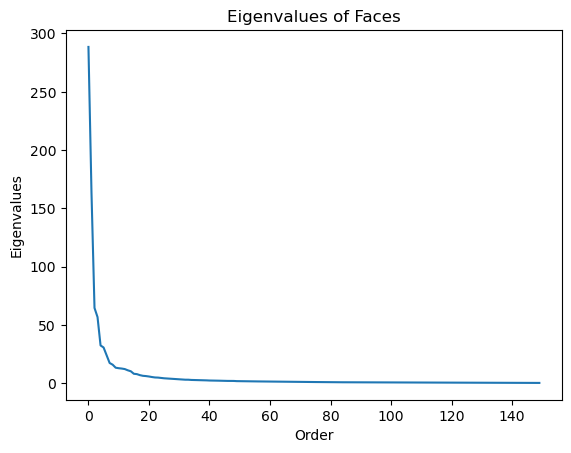

In [34]:
plt.plot(eigenvalues[:150])
plt.title("Eigenvalues of Faces")
plt.xlabel("Order")
plt.ylabel("Eigenvalues")
plt.show()

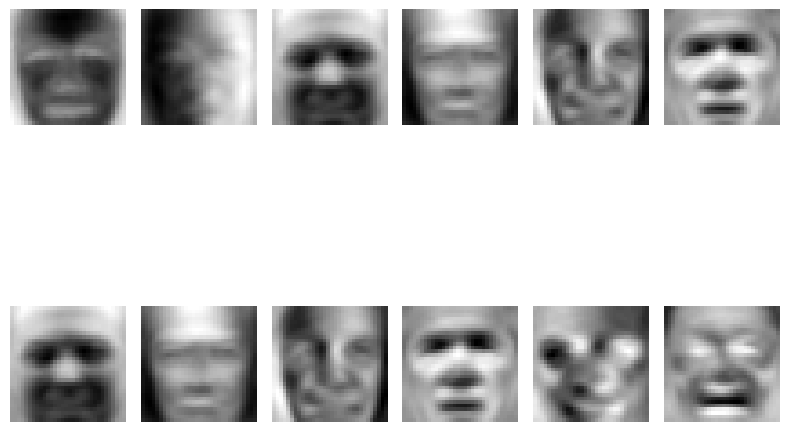

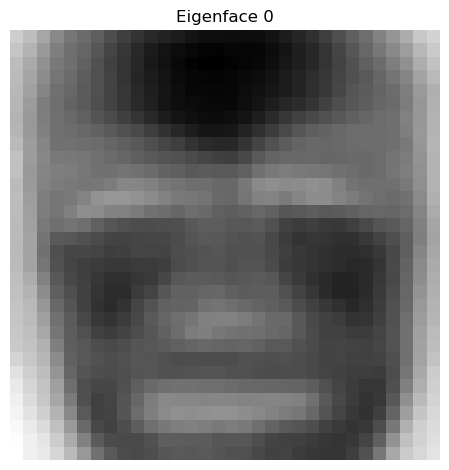

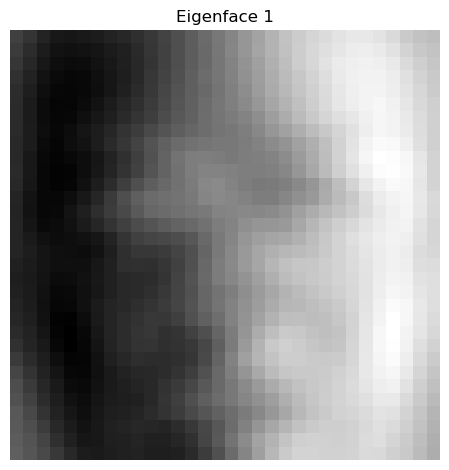

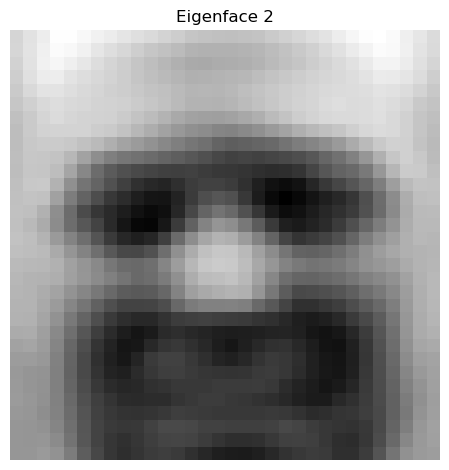

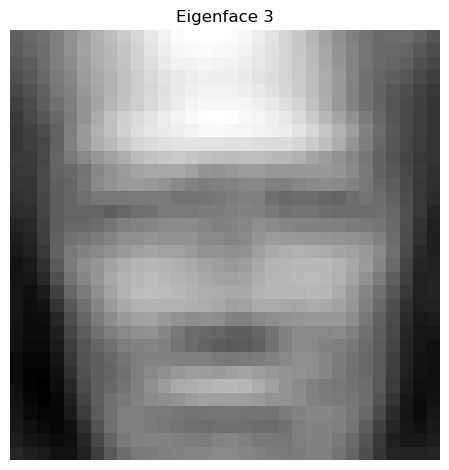

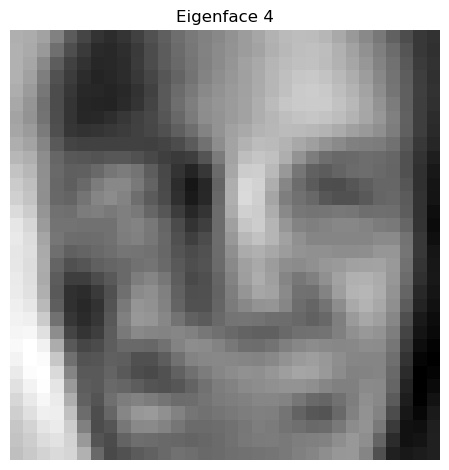

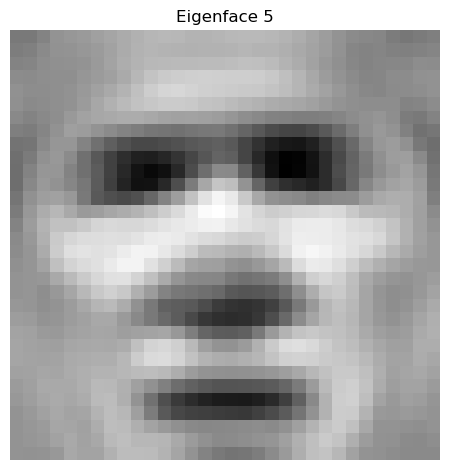

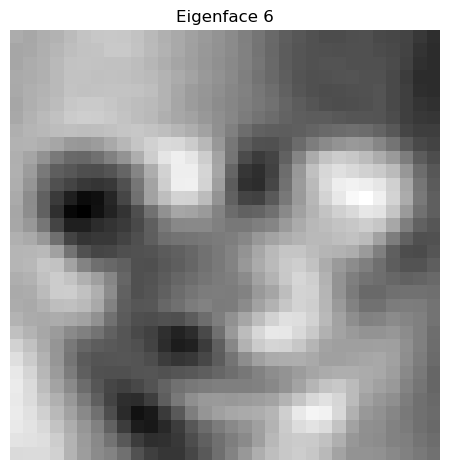

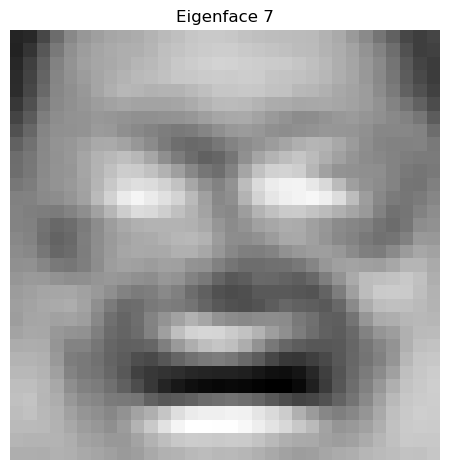

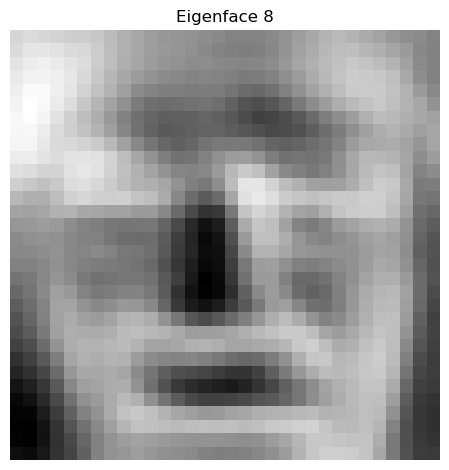

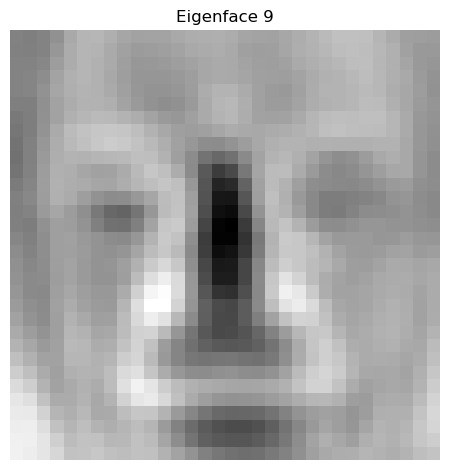

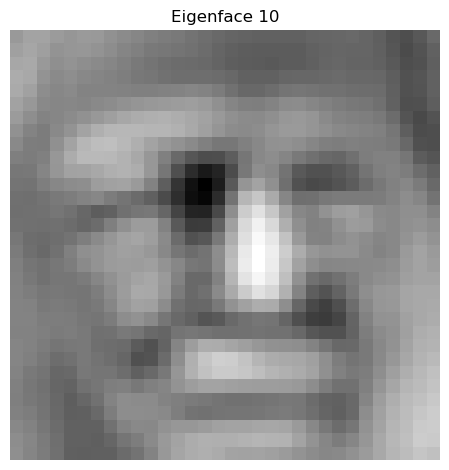

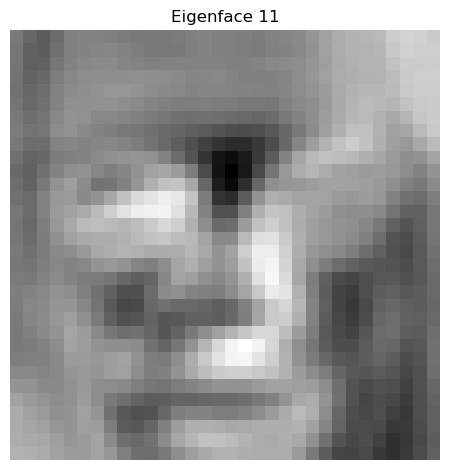

In [35]:
# Show the first 12 eigenfaces
eigenfaces = eigenvectors[:12]
fig, axs = plt.subplots(2, 6, figsize=(8, 8))
for i in range(2):
    for j in range(6):
        bild = eigenfaces[i * 2 + j].reshape(32, 32)
        axs[i, j].imshow(bild, cmap='gray')  # Hier wird angenommen, dass die Bilder Graustufenbilder sind
        axs[i, j].axis('off')  # Die Achsenbeschriftungen ausschalten

plt.tight_layout()  # Verbessert die Layoutanordnung
plt.show()


for index, eigenface in enumerate(eigenfaces):
    image = eigenface.reshape((32, 32))

    plt.imshow(image, cmap='gray')  # 'gray' colormap for grayscale images
    plt.title(f"Eigenface {index}")
    plt.axis('off')  # Turn off axis labels
    plt.tight_layout()
    plt.show()

In [36]:
# Transform the data to the first 7 eigenfaces
scores = np.dot(design_matrix, eigenvectors[:7].T)
test_scores = np.dot(df_test_data, eigenvectors[:7].T)

In [38]:
scores = pd.DataFrame(scores)
test_scores = pd.DataFrame(test_scores)

def euclidean_distance(x: np.ndarray, y: np.ndarray) -> float:
    return np.sqrt(np.sum(np.power((x - y), 2)))


for i, test_img in test_scores.iterrows():
    distances = []
    
    for _, train_img in scores.iterrows(): 
        d = euclidean_distance(train_img, test_img)
        distances.append(d)
    
    index = np.argmin(distances)
    
    print(f"Matched: {df_test_labels[0][i]} -> {df_train_labels[0][index]}")

Matched: Ariel_Sharon -> Tony_Blair
Matched: Colin_Powell -> Tony_Blair
Matched: Donald_Rumsfeld -> Tony_Blair
Matched: George_W_Bush -> George_W_Bush
Matched: Gerhard_Schroeder -> Colin_Powell
Matched: Hugo_Chavez -> George_W_Bush
Matched: Tony_Blair -> Tony_Blair
